#### Import du csv

In [949]:
# import des librairies dont nous aurons besoin
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
# chargement et affichage des données
data = pd.read_csv('dataset_assurance.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### Vérifier si les valeurs sont nulles

In [950]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [951]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [952]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Vérifications des  valeurs nuls en missingo ?

<AxesSubplot:>

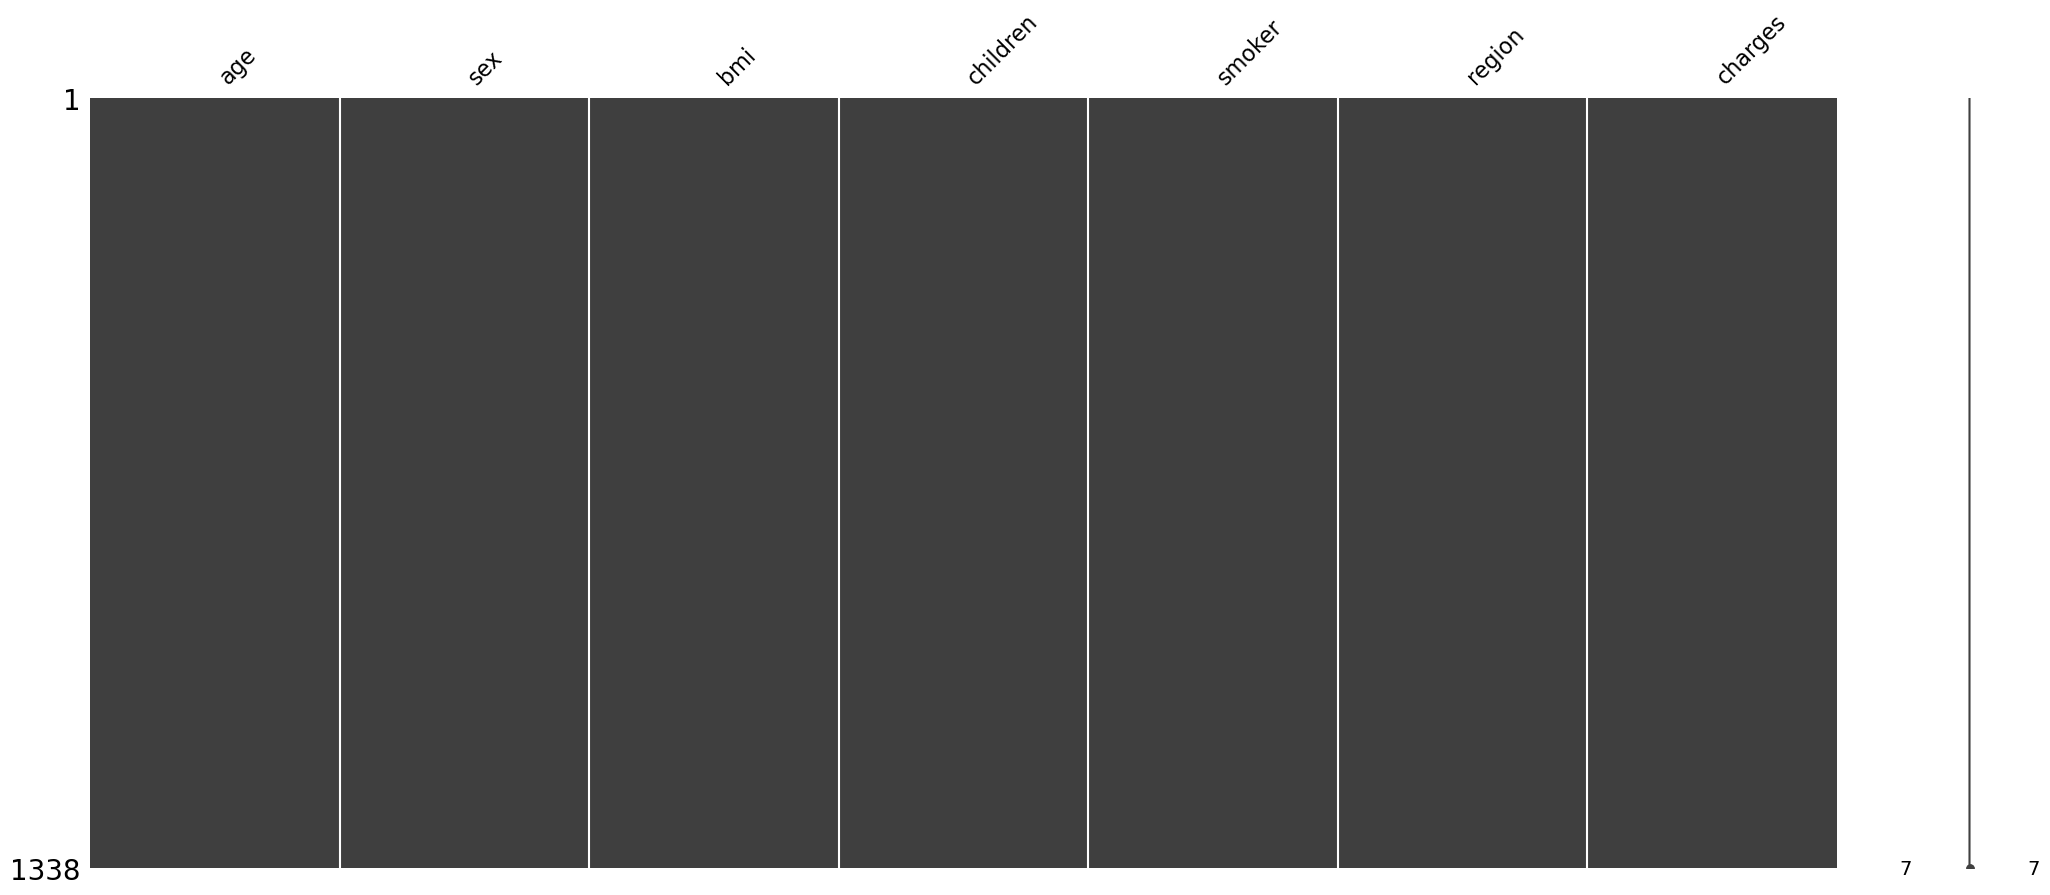

In [953]:
msno.matrix(data)

#### Remplacer les valeurs de sex par des 0 et des 1 

In [954]:
import matplotlib.pyplot as plt 

data['sex']=data['sex'].replace({'female':1 ,'male':0})
data['sex'].dtypes
x=data['sex'].value_counts()




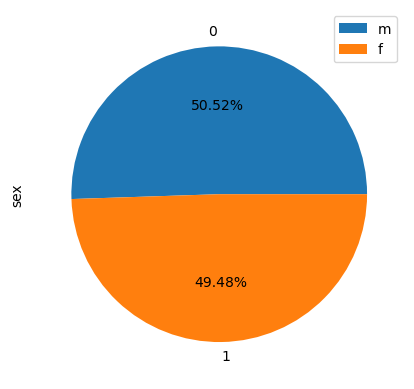

In [955]:
x.plot.pie(autopct='%.2f%%')
plt.legend('mf')

#### Remplacer les valeurs de smoker avec des 0 et des 1

In [956]:
data['smoker']=data['smoker'].replace({'yes':1 ,'no':0})
data['smoker']
y=data['smoker'].value_counts()


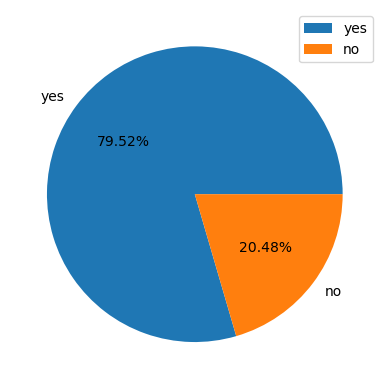

In [957]:
plt.pie(y,labels=({'yes':1 ,'no':0}),autopct='%.2f%%')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


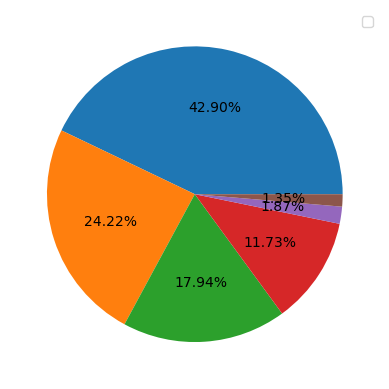

In [958]:
data['children']
s=data['children'].value_counts()
plt.pie(s,autopct='%.2f%%')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


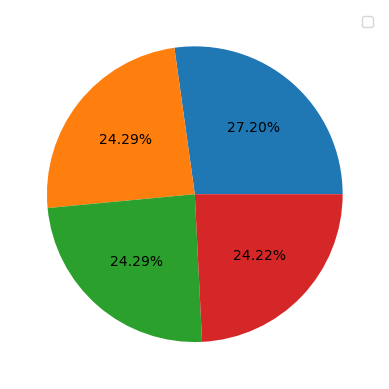

In [959]:
data['region']
z=data['region'].value_counts()
plt.pie(z,autopct='%.2f%%')
plt.legend()

#### Vérifier si il y'a des doublons et les supprimer 

In [960]:
data.loc[data.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,0,30.59,0,0,northwest,1639.5631
581,19,0,30.59,0,0,northwest,1639.5631


In [961]:
data.drop_duplicates(keep='first',inplace=True)


In [962]:
data.loc[data.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges


####  statéstiques 

In [963]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [964]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


#### représentation graphiques 

<AxesSubplot:xlabel='age', ylabel='Count'>

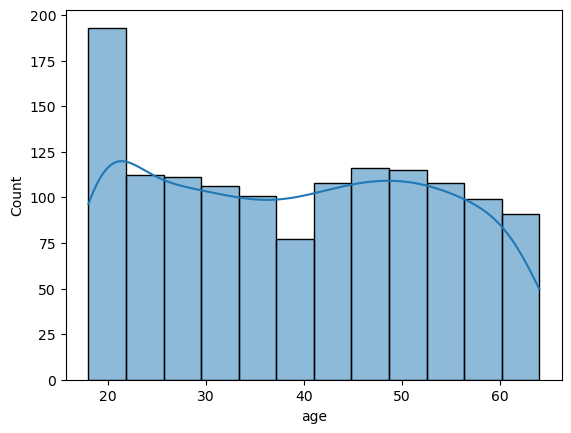

In [965]:

sns.histplot(data['age'],kde=True)


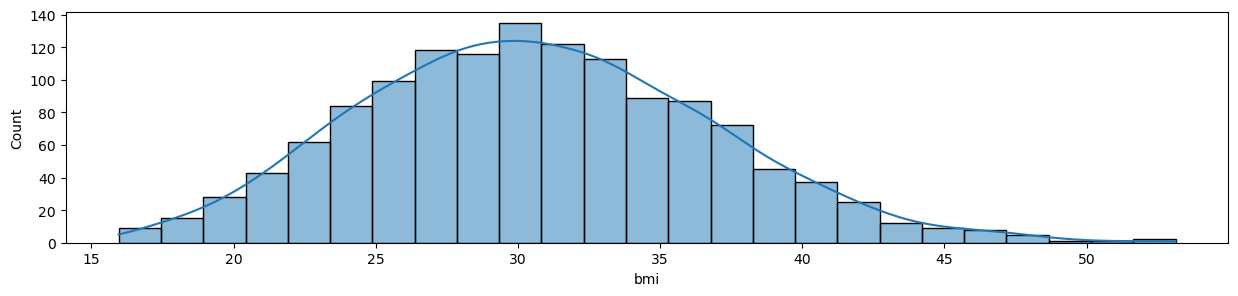

In [966]:
plt.figure(figsize=(15,3))

sns.histplot(data['bmi'],kde=True)

plt.show()

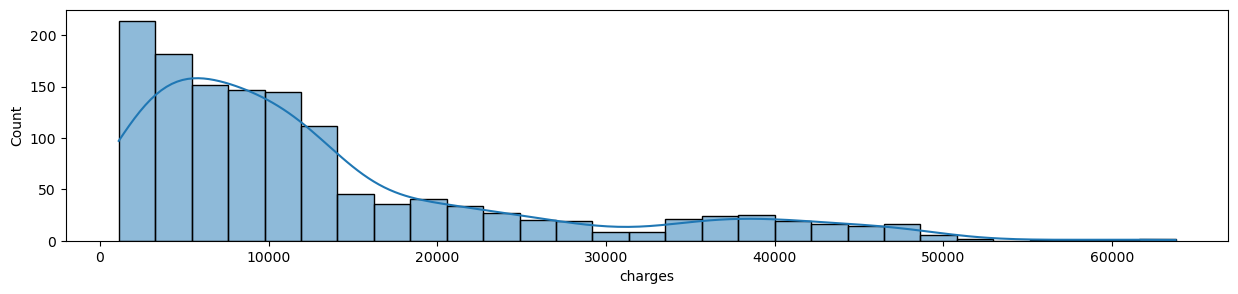

In [967]:
plt.figure(figsize=(15,3))

sns.histplot(data['charges'],kde=True)

plt.show()

In [968]:
correlation = data.corrwith(data.charges).sort_values(ascending= False ) 
correlation

/tmp/ipykernel_144583/3905918036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corrwith(data.charges).sort_values(ascending= False )


charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex        -0.058044
dtype: float64

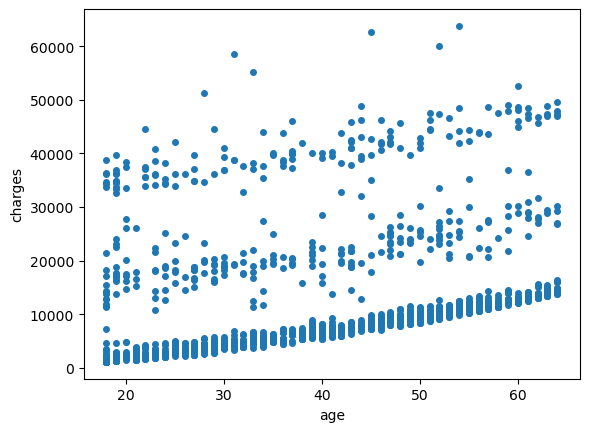

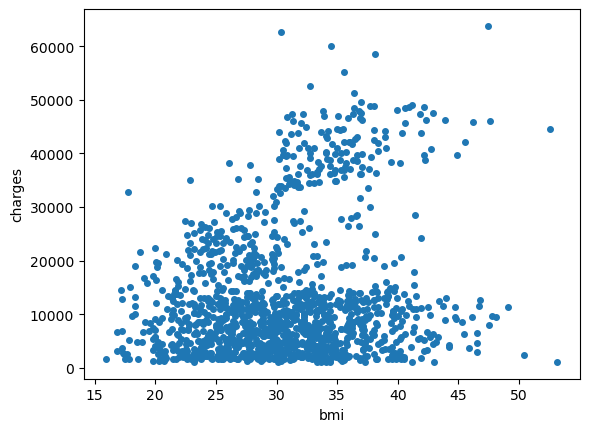

In [969]:
for index in data:
    if index in [ "age", "bmi"]:
        plt.plot(data[index], data['charges'], 'o', markersize=4) 
        plt.xlabel(index)
        plt.ylabel('charges')
        plt.show()


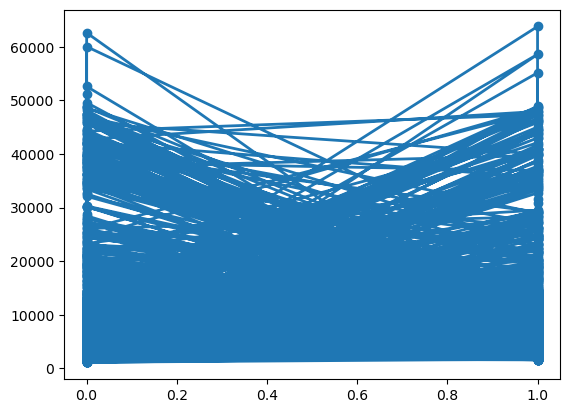

In [970]:
plt.plot(data['sex'], data['charges'], marker='o',linewidth=2 ) 

plt.show()

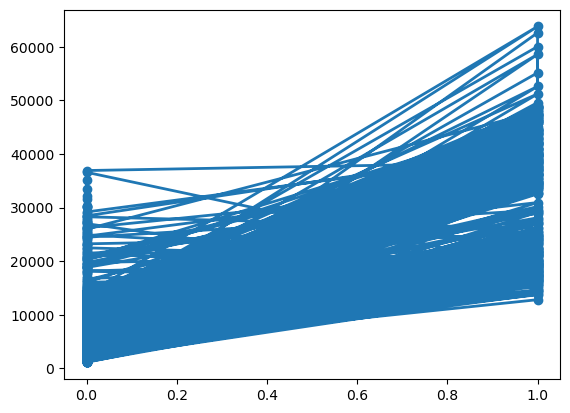

In [971]:
plt.plot(data['smoker'], data['charges'], marker='o',linewidth=2 ) 

plt.show()

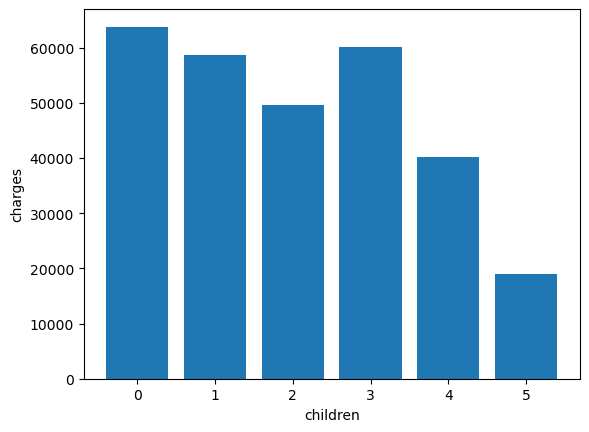

In [989]:


plt.bar(data['children'], data['charges']) 
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

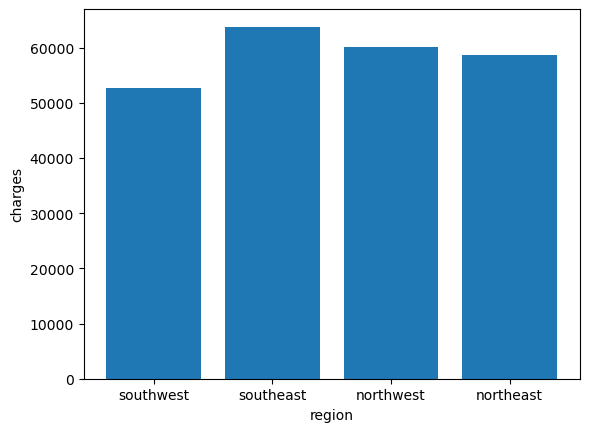

In [973]:
plt.bar(data['region'], data['charges']) 
plt.xlabel('region')
plt.ylabel('charges')
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

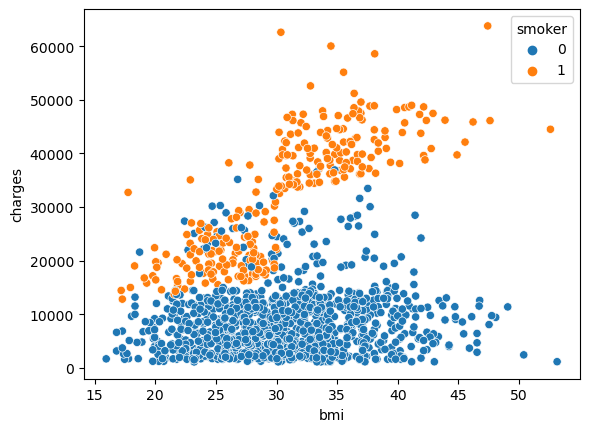

In [974]:
sns.scatterplot(x= data["bmi"], y = data["charges"], hue= data["smoker"])

<AxesSubplot:xlabel='sex', ylabel='charges'>

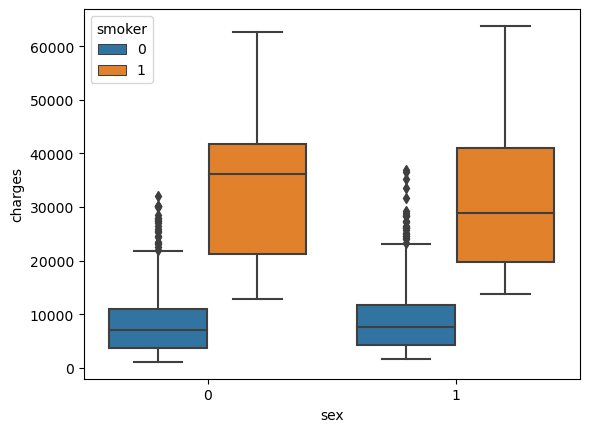

In [975]:
sns.boxplot(x= data["sex"], y = data["charges"], hue= data["smoker"])

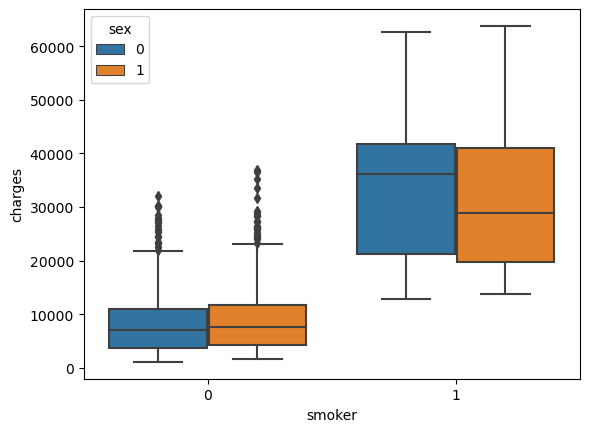

In [976]:
ax = sns.boxplot(x=data["smoker"], y=data["charges"], hue=data["sex"])

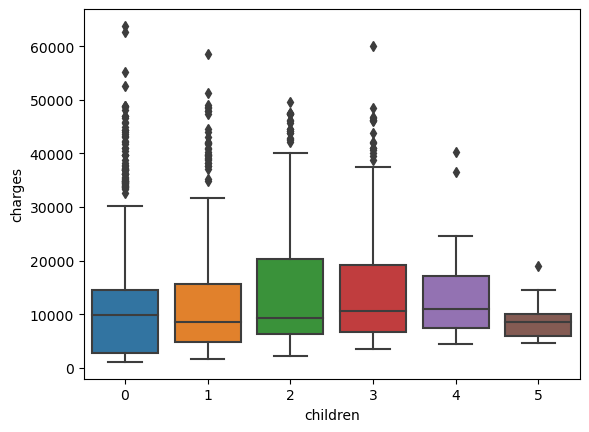

In [977]:
ax = sns.boxplot(x=data["children"], y=data["charges"])

In [978]:
#### Transformer les variables catégorielles en viariables binaires pour la colonne région 
data = pd.get_dummies(data, columns = ["region"])
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [979]:
correlation = data.corrwith(data.charges).sort_values(ascending= False ) 
correlation

charges             1.000000
smoker              0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
region_northeast    0.005945
region_northwest   -0.038695
region_southwest   -0.043637
sex                -0.058044
dtype: float64

In [983]:
corr , p_value=scipy.stats.spearmanr(data['children'],data['charges'])
corr,p_value

(0.13220013322835855, 1.2303764274728685e-06)